# import library yang di butuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Membaca Data Set

In [2]:
df = pd.read_csv('go_track_trackss.csv')

In [3]:
df.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


# persiapan dataset


In [4]:
df.rename(index=str, columns={
    'speed' : 'kecepatan',
    'distance' : 'jarak'   
}, inplace= True)

In [12]:
X = df.drop(['rating_bus', 'rating_weather', 'rating', 'linha'], axis= 1)

In [14]:
print(X)

        id  id_android  kecepatan      time  jarak  car_or_bus
0        1           0  19.210586  0.138049  2.652           1
1        2           0  30.848229  0.171485  5.290           1
2        3           1  13.560101  0.067699  0.918           2
3        4           1  19.766679  0.389544  7.700           2
4        8           0  25.807401  0.154801  3.995           1
..     ...         ...        ...       ...    ...         ...
158  38081          24  30.051732  0.218756  6.574           1
159  38082          24  30.173788  0.255387  7.706           1
160  38084          25   1.153772  0.013001  0.015           2
161  38090          26   0.843223  0.007116  0.006           2
162  38092          27   1.372998  0.016752  0.023           2

[163 rows x 6 columns]


# menentukan jumlah cluster dengan elbow

c:\Users\Gaming PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gaming PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gaming PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gaming PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

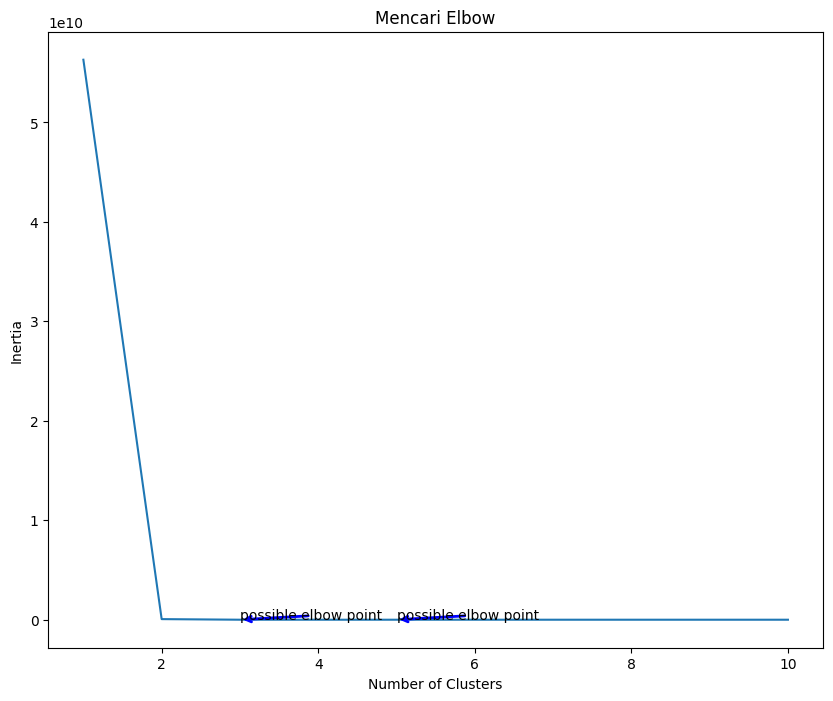

In [15]:
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')

#panah elbow
ax.annotate('possible elbow point', xy=(3,14000), xytext=(3,50000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('possible elbow point', xy=(5,80000), xytext=(5,150000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))


plt.show()

# proses clustering

In [16]:
n_clust = 5
kmeans = KMeans(n_clusters= n_clust).fit(X)
X['Labels'] = kmeans.labels_

c:\Users\Gaming PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


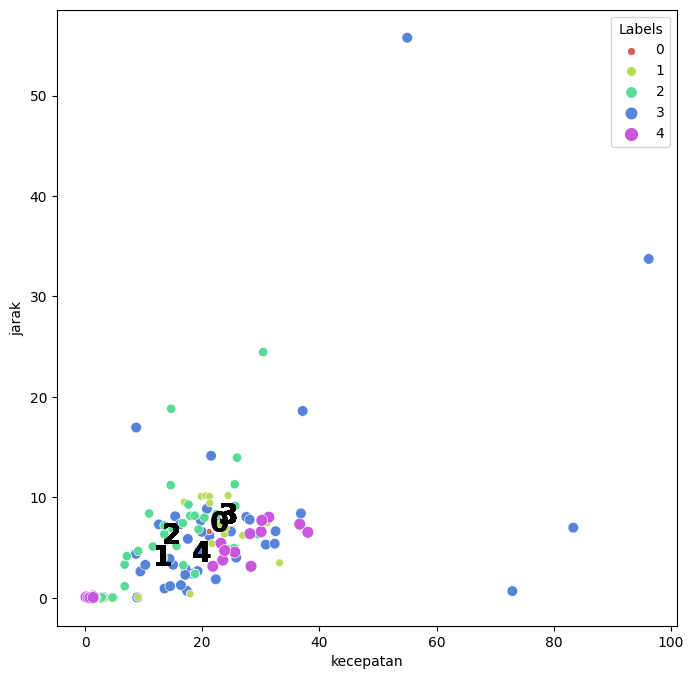

In [17]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X['kecepatan'], y=X['jarak'], hue=X['Labels'], markers=True, size=X['Labels'],
                palette=sns.color_palette('hls', len(X['Labels'].unique())))
for label in X['Labels']:
    plt.annotate(label,
                 (X[X['Labels']==label]['kecepatan'].mean(),
                  X[X['Labels']==label]['jarak'].mean()),
                 fontsize=20, weight='bold',
                 color='black')


In [10]:
print(X)

        id  id_android  kecepatan      time  jarak  car_or_bus  Labels
0        1           0  19.210586  0.138049  2.652           1       1
1        2           0  30.848229  0.171485  5.290           1       1
2        3           1  13.560101  0.067699  0.918           2       1
3        4           1  19.766679  0.389544  7.700           2       1
4        8           0  25.807401  0.154801  3.995           1       1
..     ...         ...        ...       ...    ...         ...     ...
158  38081          24  30.051732  0.218756  6.574           1       0
159  38082          24  30.173788  0.255387  7.706           1       0
160  38084          25   1.153772  0.013001  0.015           2       0
161  38090          26   0.843223  0.007116  0.006           2       0
162  38092          27   1.372998  0.016752  0.023           2       0

[163 rows x 7 columns]


In [11]:
X.to_excel("output_clusters.xlsx")